In [1]:
p = 2.5e-9 # Extra uncle risk from adding one unit of gas
R = 2e9 # Block reward in Gwei
U = 1.67e9 # Uncle reward in Gwei

def expected_reward_mev_only(Tmev, gmev):
    # MEV transactions net Tmev fees (in Gwei) and use gmev gas
    # No other transaction is added to the block
    return (1-p*gmev) * (R + Tmev) + p*gmev * U

def expected_reward_whole_block(Tmev, gmev, delta, gn):
    # MEV transactions net Tmev fees (in Gwei) and use gmev gas
    # Non-MEV transactions net delta Gwei per gas unit and use gn gas
    g = gn + gmev
    return (1-p*g) * (R + Tmev + gn * delta) + p*g * U

In [2]:
expected_reward_mev_only(1e9, 1e6) / 1e9

2.996675

In [3]:
expected_reward_whole_block(1e9, 1e6, 1, 14e6) / 1e9

2.9636

In [4]:
def delta_threshold(Tmev, g, p=p):
    return p * (R - U + Tmev) / (1 - p*g)

Text(0, 0.5, 'Miner fee (in Gwei per gas unit)')

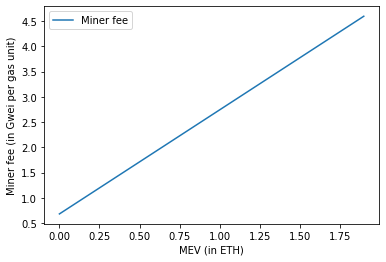

In [5]:
import numpy as np
import pandas as pd

ax = pd.DataFrame({
    "Tmev": np.arange(start=0, stop=2, step=0.1),
    "Miner fee": [delta_threshold(i * 1e9, 15e6, p=2e-9) for i in np.arange(start=0, stop=2, step=0.1)]
}).plot("Tmev", "Miner fee")
ax.set_xlabel("MEV (in ETH)")
ax.set_ylabel("Miner fee (in Gwei per gas unit)")